In [5]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
home_data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='longitude', ylabel='latitude'>

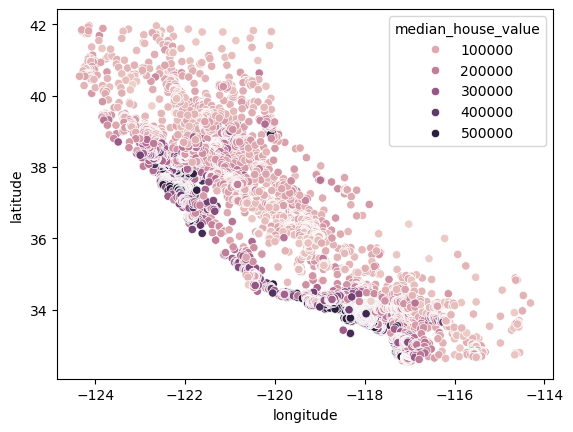

In [9]:
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [13]:
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)
print(X_train_norm)

[[ 0.26937372 -0.96303572]
 [ 0.2762676  -0.96108075]
 [ 0.27623513 -0.96109009]
 ...
 [ 0.28741997 -0.95780466]
 [ 0.27416102 -0.9616838 ]
 [ 0.27304949 -0.96199999]]


In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

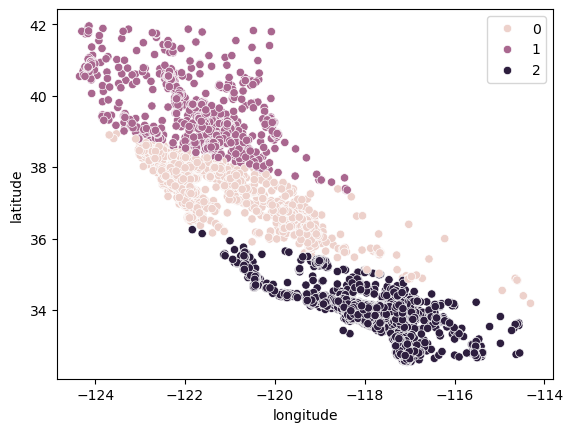

In [17]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

<Axes: ylabel='median_house_value'>

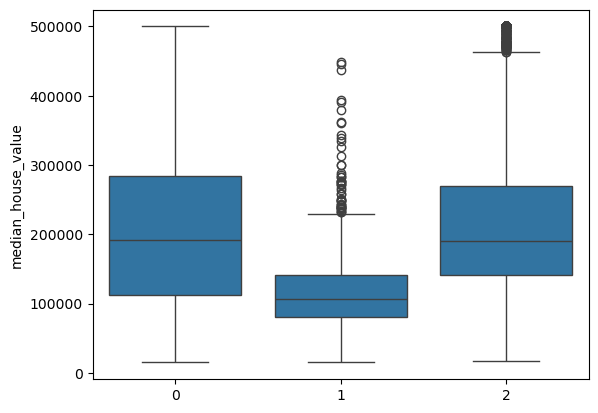

In [19]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

In [21]:
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499371920917443

In [22]:
K = range(2, 8)
fits = []
score = []

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: xlabel='longitude', ylabel='latitude'>

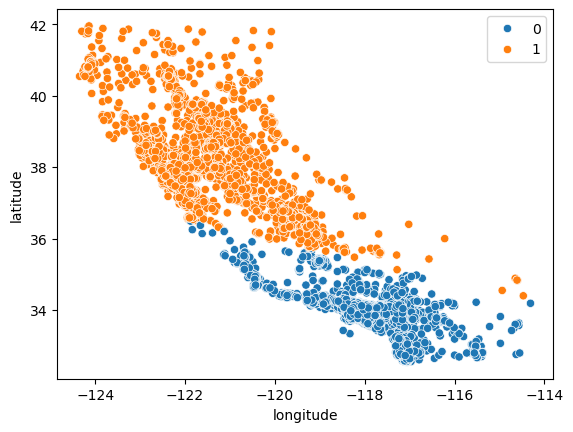

In [24]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

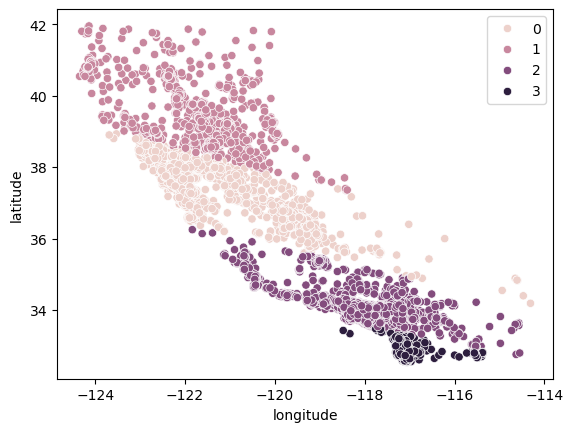

In [25]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

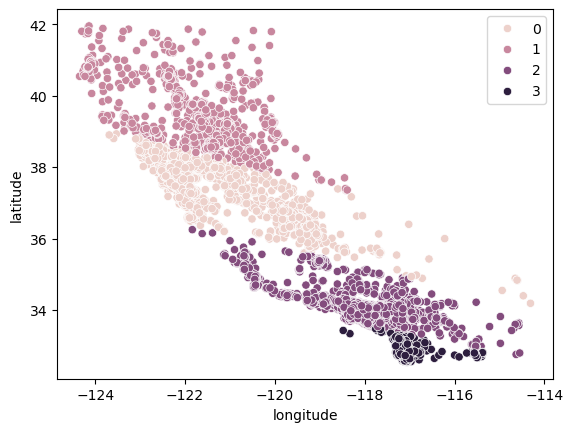

In [26]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

<Axes: >

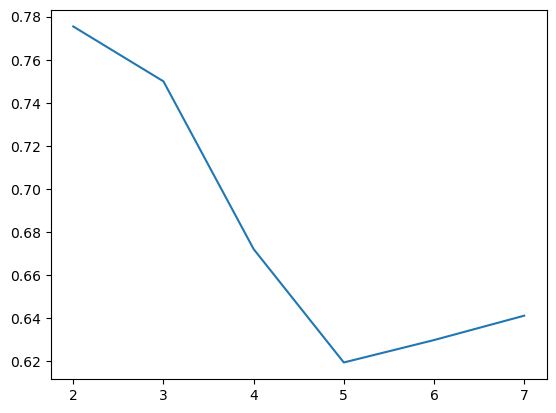

In [27]:
sns.lineplot(x = K, y = score)

<Axes: xlabel='longitude', ylabel='latitude'>

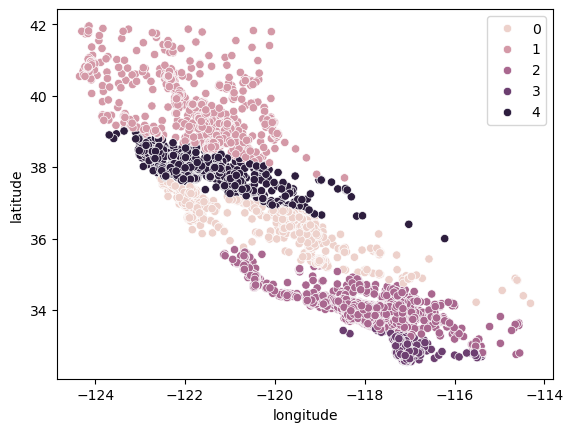

In [28]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

<Axes: ylabel='median_house_value'>

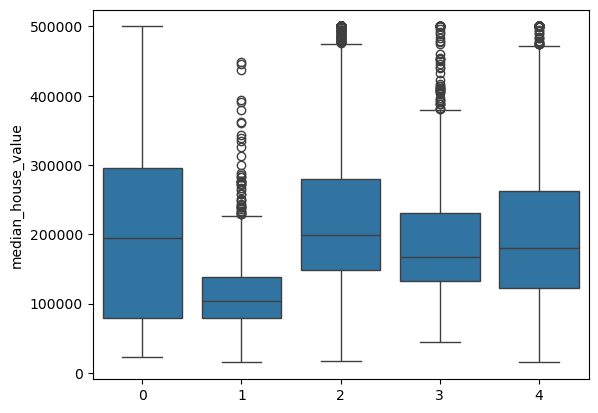

In [29]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])